In [54]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
dt     = []
sd_lst = np.array([])
sc_lst = np.array([])
pb_lst = np.array([])

In [3]:
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/'
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/batch_test'
#path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20170401_clipped.tif'


for f in sorted(glob.glob(os.path.join(path, '*.tif'))):
    print(f)
    dt_str = f.split('/')[-1]
#     print(dt_str)
#     dt_str = "".join(dt_str.isnumeric())
    for c in dt_str:
        dt_str = "".join([c for c in dt_str if c.isnumeric()])
        
#         for c in dt_str:
#             if c.is_numeric():
#                 dtst.append(c)
#         d_str = "".join(dst)
#         print(dt_str)
    


    raster = io.imread(f) #path

#     io.imshow(raster[:,:,0]) #snow depth, band1
#     io.show()

#     io.imshow(raster[:,:,1]) #alpha mask, band2
#     io.show()


    # convert to numpy array
    array = np.array(raster[:,:,0]) #RAW array of lidar tif

    # "snow mask", array of data and nans
    sno_mask = array.copy()
    idx=sno_mask > 0.001
    sno_mask[~idx] = np.nan
    
#     plt.imshow(sno_mask) 
#     plt.title('mask')
#     plt.colorbar()
#     plt.show()

    # meanSD -- caclulate mean snow depth (meanSD), without zero snow pixels
    mu_sd = np.nanmean(sno_mask) #mean snow depth, from sca's
#     print("mean snow depth", mu_sd,'meters')


    # SCA -- pixs snow cover * pixel size
#     num_pix = np.sum(array>0) #sum pixels >0
#     print("number pixels with snow cover",num_pix)
    
    ras =  rasterio.open(f) #getting pixel size
    gt = ras.transform
    pixelSizeX = gt[0]
    pixelSizeY =-gt[4] #notice the -gt
#     print('pixel size (x,y) = ',pixelSizeX, pixelSizeY)


    sca_km = np.sum(array>0) * pixelSizeX * pixelSizeY /1000**2
    
    
#     sca = num_pix * pixelSizeX * pixelSizeY
#     sca_km = sca/1000**2
    p_basin = sca_km/1180 *100  #per Hedrick et al. 2018
#     print('Snow Covered Area (SCA) = ', sca, 'm^2')
#     print('Snow Covered Area (SCA) = ', sca_km, 'km^2')
#     print('% Basin snow cover', p_basin, '%')

   
    
#     array.close()
#     sno_mask.close()
#     ras.close()
    dt.append(dt_str)
    
    sd_lst = np.append(sd_lst,mu_sd)
    sc_lst = np.append(sc_lst,sca_km)
    pb_lst = np.append(pb_lst,p_basin)

dt = pd.to_datetime(dt)

# print(dt)

# df1 = pd.DataFrame(zip(dt,sd_lst,sc_lst,pb_lst),columns = ['date','meanSD (m)','SCA (km)','% basin'],index_col = ['dt'])
# df1

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130403_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130429_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130503_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130525_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130601_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130608_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140323_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140407_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140413_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater


/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160401_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160407_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160416_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160426_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160509_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160527_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160607_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160613_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160620_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar

,date,meanSD (m),SCA (km),% basin
0,2013-04-03,1.456748,590.093682,50.007939
1,2013-04-29,1.146422,452.968977,38.387201
2,2013-05-03,1.069508,389.105030,32.975003
3,2013-05-25,0.946180,206.605858,17.508971
4,2013-06-01,0.945787,155.446059,13.173395
5,2013-06-08,0.845570,94.211339,7.984012
6,2014-03-23,1.065971,585.332593,49.604457
7,2014-04-07,1.221284,704.831855,59.731513
8,2014-04-13,1.106676,623.311542,52.823012
9,2014-04-20,1.152036,518.800971,43.966184


[2013, 2014, 2015, 2016, 2017, 2018]
2013-04-03 00:00:00


ValueError: x and y must have same first dimension, but have shapes (1,) and (51,)

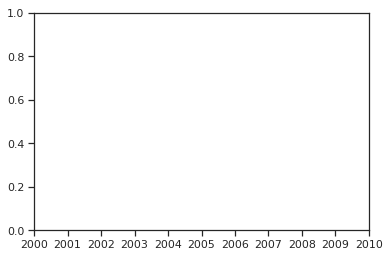

In [63]:
df1 = pd.DataFrame(zip(sd_lst,sc_lst,pb_lst),columns = ['meanSD (m)','SCA (km)','% basin'],index = dt)
df1

years = sorted(set([dt.year for dt in df1.index])) #set find uniques in list comp (loop that appends for you)
print(years)

# print(dt.years)

for year in df1.index:
    print(year)
    plt.plot(year,df1['meanSD (m)'])
    
    
# for yr in df1.index:
#     print(yr)
    
#     sys.exit()



ValueError: too many values to unpack (expected 2)

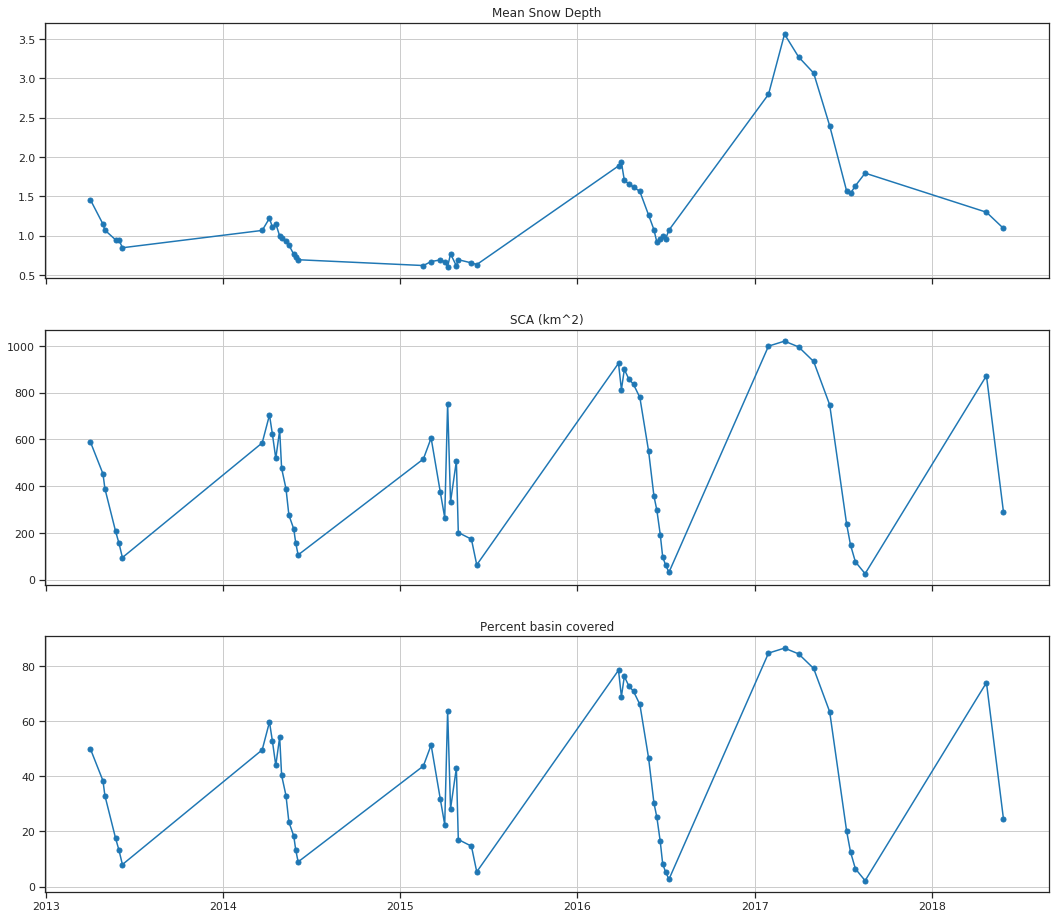

In [39]:
# fig, a=plt.subplots(3,1)
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True,figsize=(18,16))

ax1.plot(df1['meanSD (m)'], '-o', markersize=5)
ax1.set_title('Mean Snow Depth')

ax2.plot(df1['SCA (km)'], '-o', markersize=5)
ax2.set_title('SCA (km^2)')

ax3.plot(df1['% basin'], '-o', markersize=5)
ax3.set_title('Percent basin covered')

for ax in fig.get_axes():
    ax.grid(True)
    
# for xy in zip(mu_sd):
# #     ax.annotate(dt,xy=(dt,mu_sd))
#     ax.annotate('%s,%s)' % xy, xy=xy)

for k, v in df1.iterrows():
    ax.annotate(k, v)
    

# a[0].plot(df1['meanSD (m)'])
# a[1].plot(df1['SCA (km)'])
# a[2].plot(df1['% basin'])

sns.set_style('darkgrid')
sns.set_style("ticks")
sns.set_context('notebook')

In [38]:
print(zip(dt,mu_sd))

TypeError: zip argument #2 must support iteration

In [44]:
#Subnaught example: add to how to, snippits
#list comp and testing multiple cases
#condense if statements
cases = ["test1", "test2", "test3", "test4"]

test_list = ["test1", "test2", "test", "apple"]

truths = [True for match in test_list if match in cases]
if len(truths) == 3:
    print("yay gor for")